<p align="center">
_____________________________________________________________________________________________________________________________

<br>
<br>
  <img src="https://www.estudiaradistancia.com.ar/logos/original/logo-universidad-de-buenos-aires.webp" height=180 />
  <img  src="https://confedi.org.ar/wp-content/uploads/2020/09/fiuba_logo.jpg" height="180">
<br>
_____________________________________________________________________________________________________________________________
<br>
<br>
<font size="+3">
[71.12] Análisis Numérico I
<br>
Trabajo Práctico I
<br>
Primer Cuatrimestre 2022
</font>
<br>
<br>
_____________________________________________________________________________________________________________________________
<br>
<br>
<font size="+2">
Desarrollo de métodos numéricos de busqueda de raíces e interpolacion
<br>
de Spline cúbica para su aplicación en problemas de optimización industrial. 
</font>
<br>
<br>
_____________________________________________________________________________________________________________________________
<br>
<br>
<font size="+2">
AUTORES
</font>
<br>
<font size="+1">
Gamberale Luciano Martin,
<br>  
Veiga Martin,
<br>
Godoy Dupont Mateo,
<br>
Vasquez Jimenez Miguel Angel,
</font>
<br>
<br>
<font size="+2">
DOCENTES
</font>
<br>
<font size="+1">
Sassano Myriam Patricia
<br>
Garcia Ezequiel
<br>
Husain Santiago
<br>
Payva Matias
<br>
Turano Maria Agustina
<br>
Vera Ramiro
</font>
<br>
<br>
<br>

_____________________________________________________________________________________________________________________________
</p>




___________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________


# ***1. Plan de producción:***

Se le solicita el área "Supply Chain"que indique qué mix de productos es más conveniente
fabricar mensualmente dada una serie de restricciones que tiene la planta y la contribución
marginal que ofrece cada producto.

 Como nuevo pasante del área le asignan el cálculo para
el producto estrella de la empresa, acero de calidad “E41” utilizado para fabricar perfiles de
"Steel Frame".

Consulta con el área de Rentabilidad la utilidad unitaria del producto, y le informan que la
misma responde a la siguiente función: $$0,001·x·(x−1000kg
)^2$$, donde x es la cantidad de producto
a producir (medida en kilogramos), y que para producirse debe alcanzarse los $25000
de contribución mensual.

Luego, llama al área de Producción y le consulta por las restricciones que tiene la línea donde
se fabrica este producto.

Le informan que para que se justifique hacer el set up para prender
la máquina correspondiente, se deberán fabricar al menos $827 kg$ del mismo.

## ***Implementacion de metodos de busqueda de Raices:***

### **Definiciones, funciones e imports auxiliares:**

#### *Imports* 

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from math import isclose

MAX_ITERACIONES = 30

#### *Calculo de orden de convergencia ($\alpha$)*



In [57]:
def calcular_orden_de_convergencia_alfa(lista_pn):
    lista_orden_de_convergencia = []

    for i in range(len(lista_pn) - 1):
        alpha_i = None
        if(i >= 2):
            alpha_i = ((np.log(abs((lista_pn[i+1]-lista_pn[i])/(lista_pn[i]-lista_pn[i-1])))) / (np.log(abs((lista_pn[i]-lista_pn[i-1])/(lista_pn[i-1]-lista_pn[i-2])))))
            lista_orden_de_convergencia.append(alpha_i)
        else:
            lista_orden_de_convergencia.append(None)

    return lista_orden_de_convergencia

#### *Calculo de la constante asintótica ($\lambda$)*

In [58]:
def calcular_cte_asintotica_lambda(lista_errores, lista_alfas):
    if(len(lista_errores) != len(lista_alfas)+1):
        print("La listas recibidas deben poseer el mismo tamaño.")
        return None

    lista_cte_asintotica = []

    for i in range(len(lista_alfas)):
        lambda_i = None
        if(i >= 2):
            if (lista_errores[i-1] != None) : # Condicion necesaria por metodo Secante
                lambda_i = lista_errores[i] / (lista_errores[i-1] ** lista_alfas[i])
                lista_cte_asintotica.append(lambda_i)
        else:
            lista_cte_asintotica.append(None)

    return lista_cte_asintotica

#### *Funciones de iteraciones funcionales*

###### Para métodos de semilla única
$g(x) = x - 𝝋(x)f(x) $ ;

con $𝝋(x)$ definida dependiedo del método (Punto fijo, NR, NR modificado)


In [59]:
def iteracion_funcional_recursiva(g, numero_iteracion, tolerancia, lista_resultados):
    if(numero_iteracion == MAX_ITERACIONES): 
        return "Se llegó al maximo de iteraciones sin encontrar la raiz."  

    pn_1 = lista_resultados[numero_iteracion-1][0]
    pn = g(pn_1)

    error_actual = np.abs(pn_1 - pn)

    lista_resultados_n = [pn, error_actual]  #[pn, error]  
    lista_resultados.append(lista_resultados_n)
                            
    if((g(pn) == 0) or (error_actual < tolerancia)):
        return lista_resultados  

    return iteracion_funcional_recursiva(g, numero_iteracion+1, tolerancia, lista_resultados)


###### Caso particular método Secante (semilla doble)
$g(x,y) = x - 𝝋(x,y)f(x)$ 

In [60]:
def iteracion_funcional_recursiva_de_dos_semillas(g, numero_iteracion, tolerancia, lista_resultados):
    if(numero_iteracion == MAX_ITERACIONES): 
        return "Se llegó al maximo de iteraciones sin encontrar la raiz."  

    pn_1 = lista_resultados[numero_iteracion-1][0]
    pn_2 = lista_resultados[numero_iteracion-2][0]
    pn = g(pn_1,pn_2)

    error_actual = np.abs(pn - pn_1)

    lista_resultados_n = [pn, error_actual]  # [pn, error]  
    lista_resultados.append(lista_resultados_n)
        
    if(error_actual < tolerancia):
        return lista_resultados  

    return iteracion_funcional_recursiva_de_dos_semillas(g, numero_iteracion+1, tolerancia, lista_resultados)

#### *Funciones para extraccion de datos una vez completada la aplicacion de los metodos para problemas especificos*

###### Extraccion de valores importantes tras biseccion 
Dichos valores son:

$p_n$ o de errores: $|p_n-p_{n-1}|$  de cada iteración a partir de la
lista con resultados totales del método de biseccion (exclusivamente)

In [61]:
def extraer_pn_biseccion(lista_resultados):
    lista_xi = []

    for i in range(len(lista_resultados)):
        lista_xi.append(lista_resultados[i][2])

    return lista_xi



def extraer_errores_biseccion(lista_resultados):
    lista_xi = []

    for i in range(len(lista_resultados)):
        lista_xi.append(lista_resultados[i][3])

    return lista_xi

###### Extraccion de valores importantes tras metodos de iteracion funcional
Dichos valores son:

$p_n$ o de errores: $|p_n-p_{n-1}|$  de cada iteración a partir de la
lista con resultados totales de cualquiera de los metodos con iteracion funcional

In [62]:
# Extrae los valores de pn cada iteración a partir de la lista con resultados totales 
def extraer_pn(lista_resultados):
    lista_xi = []

    for i in range(len(lista_resultados)):
        lista_xi.append(lista_resultados[i][0])

    return lista_xi



def extraer_errores(lista_resultados):
    lista_xi = []

    for i in range(len(lista_resultados)):
        lista_xi.append(lista_resultados[i][1])

    return lista_xi

### **Metodo de la biseccion**

In [63]:
def biseccion_recursivo(funcion, numero_iteracion, an, bn, tolerancia, lista_resultados):
    if(MAX_ITERACIONES == numero_iteracion): 
        print("Se llegó al maximo de iteraciones sin encontrar la raiz.")
        return None

    pn = (an+bn)/2 
    error_actual = np.abs((bn-an)/2)
    lista_resultados_n = [an, bn, pn, error_actual]  #[an, bn, pn, error]  
    lista_resultados.append(lista_resultados_n)
                            
    if((error_actual < tolerancia) or (isclose(funcion(pn), 0))):
        return lista_resultados

    if(funcion(an) * funcion (pn) > 0):
        an = pn
    elif(funcion(bn) * funcion (pn) > 0):
        bn = pn

    return biseccion_recursivo(funcion, numero_iteracion+1, an, bn, tolerancia, lista_resultados) 


def biseccion(funcion, an, bn, tolerancia): 
    lista_resultados = []
    numero_de_iteracion = 0
    
    if((an >= bn) or (tolerancia <= 0) or (MAX_ITERACIONES <= 0)):
        print("Error en los parametros al ejecutar el método")
        return None 

    return biseccion_recursivo(funcion, numero_de_iteracion, an, bn, tolerancia, lista_resultados)



#### Ejemplo de uso

In [64]:

f = lambda x:  x - np.e**-x
a0 = 0.1
b0 = 1

lista_resultados_biseccion = biseccion(f, a0, b0, tolerancia=1e-06)
lista_pn_biseccion = extraer_pn_biseccion(lista_resultados_biseccion)
lista_errores_biseccion = extraer_errores_biseccion(lista_resultados_biseccion)
lista_alfa_biseccion = calcular_orden_de_convergencia_alfa(lista_pn_biseccion)
lista_cte_asintotica_biseccion = calcular_cte_asintotica_lambda(lista_errores_biseccion, lista_alfa_biseccion)


# FALTA CAMBIAR TODOS LOS PRINTS A QUE SE MUESTREN EN TABLAS:
print(lista_resultados_biseccion)
print(lista_pn_biseccion)
print(lista_errores_biseccion)
print(lista_alfa_biseccion)
print(lista_cte_asintotica_biseccion)

[[0.1, 1, 0.55, 0.45], [0.55, 1, 0.775, 0.22499999999999998], [0.55, 0.775, 0.6625000000000001, 0.11249999999999999], [0.55, 0.6625000000000001, 0.6062500000000001, 0.05625000000000002], [0.55, 0.6062500000000001, 0.578125, 0.02812500000000001], [0.55, 0.578125, 0.5640625, 0.014062499999999978], [0.5640625, 0.578125, 0.57109375, 0.007031249999999989], [0.5640625, 0.57109375, 0.567578125, 0.0035156249999999667], [0.5640625, 0.567578125, 0.5658203125000001, 0.001757812500000011], [0.5658203125000001, 0.567578125, 0.5666992187500001, 0.0008789062499999778], [0.5666992187500001, 0.567578125, 0.567138671875, 0.0004394531249999889], [0.567138671875, 0.567578125, 0.5673583984375, 0.0002197265625000222], [0.567138671875, 0.5673583984375, 0.56724853515625, 0.0001098632812500111], [0.567138671875, 0.56724853515625, 0.567193603515625, 5.4931640624977796e-05], [0.567138671875, 0.567193603515625, 0.5671661376953125, 2.7465820312488898e-05], [0.567138671875, 0.5671661376953125, 0.5671524047851563, 1

### **Metodo Punto Fijo**

In [65]:
def metodo_punto_fijo(funcion, p0, tolerancia):
    lista_resultados = []
    numero_iteracion = 0
    g = lambda x: x - funcion(x)

    if((tolerancia <= 0) or (MAX_ITERACIONES <= 0)):
        return "Error en los parametros al ejecutar el método"

    lista_resultados.append([p0, None])

    return iteracion_funcional_recursiva(g, numero_iteracion+1, tolerancia, lista_resultados)




#### Ejemplo de uso

In [66]:

f = lambda x:  x - np.e**-x
semilla_p0 = 0.55


lista_resultados_punto_fijo = metodo_punto_fijo(f, semilla_p0, tolerancia=1e-06)
lista_pn_punto_fijo = extraer_pn(lista_resultados_punto_fijo)
lista_alfa_punto_fijo = calcular_orden_de_convergencia_alfa(lista_pn_punto_fijo)
lista_errores_punto_fijo = extraer_errores(lista_resultados_punto_fijo)
lista_cte_asintotica_punto_fijo = calcular_cte_asintotica_lambda(lista_errores_punto_fijo, lista_alfa_punto_fijo)



# FALTA CAMBIAR TODOS LOS PRINTS A QUE SE MUESTREN EN TABLAS:
print(lista_resultados_punto_fijo)
print(lista_pn_punto_fijo)
print(lista_errores_punto_fijo)
print(lista_alfa_punto_fijo)
print(lista_cte_asintotica_punto_fijo)


[[0.55, None], [0.5769498103804866, 0.026949810380486605], [0.5616087699523267, 0.01534104042815998], [0.5702908586588951, 0.008682088706568392], [0.5653609746479221, 0.00492988401097294], [0.5681550201786464, 0.002794045530724265], [0.5665697848249219, 0.0015852353537244568], [0.5674686435412523, 0.0008988587163303308], [0.5669587985783827, 0.0005098449628695434], [0.567247933366687, 0.0002891347883042794], [0.567083945963931, 0.0001639874027560273], [0.5671769482127644, 9.300224883346253e-05], [0.5671242019338935, 5.274627887097427e-05], [0.5671541164141349, 2.991448024147747e-05], [0.5671371505472894, 1.6965866845519706e-05], [0.5671467726022917, 9.622055002322938e-06], [0.5671413155111056, 5.4570911861562266e-06], [0.5671444104614245, 3.0949503189159344e-06], [0.5671426551803668, 1.7552810577248223e-06], [0.5671436506760001, 9.954956333713127e-07]]
[0.55, 0.5769498103804866, 0.5616087699523267, 0.5702908586588951, 0.5653609746479221, 0.5681550201786464, 0.5665697848249219, 0.567468

### **Metodo Newton-Raphson**

In [67]:

def metodo_newton_raphson(funcion, derivada_funcion, p0, tolerancia):
    lista_resultados = []
    numero_iteracion = 0
    g = lambda x: x - funcion(x)/derivada_funcion(x)

    if((tolerancia <= 0) or (MAX_ITERACIONES <= 0)):
        return "Error en los parametros al ejecutar el método"

    lista_resultados.append([p0, None])

    return iteracion_funcional_recursiva(g, numero_iteracion+1, tolerancia, lista_resultados)



#### Ejemplo de uso

In [68]:

f = lambda x:  x - np.e**-x
derivada_f = lambda x:  1 + np.e**-x
semilla_p0 = 0.55


lista_resultados_NR = metodo_newton_raphson(f, derivada_f, semilla_p0, tolerancia=1e-06)
lista_pn_NR = extraer_pn(lista_resultados_NR)
lista_alfa_NR = calcular_orden_de_convergencia_alfa(lista_pn_NR)
lista_errores_NR = extraer_errores(lista_resultados_NR)
lista_cte_asintotica_NR = calcular_cte_asintotica_lambda(lista_errores_NR, lista_alfa_NR)


# FALTA CAMBIAR TODOS LOS PRINTS A QUE SE MUESTREN EN TABLAS:
print(lista_resultados_NR)
print(lista_pn_NR)
print(lista_errores_NR)
print(lista_alfa_NR)
print(lista_cte_asintotica_NR)


[[0.55, None], [0.567089833933259, 0.017089833933258913], [0.567143289892699, 5.3455959440062983e-05], [0.567143290409784, 5.170849304292346e-10]]
[0.55, 0.567089833933259, 0.567143289892699, 0.567143290409784]
[None, 0.017089833933258913, 5.3455959440062983e-05, 5.170849304292346e-10]
[None, None, 2.0019765790438386]
[None, None, 0.18450730991414008]


### **Metodo Newton-Raphson modificado para raices multiples**

In [69]:

def metodo_newton_raphson_para_raices_multiples(funcion, derivadaFuncion, derivadaSegundaFuncion, p0, tolerancia):
    lista_resultados = []
    numero_iteracion = 0
    g = lambda x: x - (funcion(x)*derivadaFuncion(x))/(derivadaFuncion(x)**2 - funcion(x)*derivadaSegundaFuncion(x))

    if((tolerancia <= 0) or (MAX_ITERACIONES <= 0)):
        return "Error por tolerancia o por max. iteraciones al ejecutar el método"

    lista_resultados.append([p0, None])

    return iteracion_funcional_recursiva(g, numero_iteracion+1, tolerancia, lista_resultados)



#### Ejemplo de uso

In [70]:


f = lambda x:  x - np.e**-x
derivada_f = lambda x:  1 + np.e**-x
derivada_segunda_f = lambda x:  -np.e**-x
semilla_p0 = 0.55


lista_resultados_NR_multiple = metodo_newton_raphson_para_raices_multiples(f, derivada_f, derivada_segunda_f, semilla_p0, tolerancia=1e-06)
lista_pn_NR_multiple = extraer_pn(lista_resultados_NR_multiple)
lista_alfa_NR_multiple = calcular_orden_de_convergencia_alfa(lista_pn_NR_multiple)
lista_errores_NR_multiple = extraer_errores(lista_resultados_NR_multiple)
lista_cte_asintotica_NR_multiple = calcular_cte_asintotica_lambda(lista_errores_NR_multiple, lista_alfa_NR_multiple)


# FALTA CAMBIAR TODOS LOS PRINTS A QUE SE MUESTREN EN TABLAS:
print(lista_resultados_NR_multiple)
print(lista_pn_NR_multiple)
print(lista_errores_NR_multiple)
print(lista_alfa_NR_multiple)
print(lista_cte_asintotica_NR_multiple)


[[0.55, None], [0.5671973615021451, 0.017197361502145014], [0.567143290938791, 5.407056335404725e-05], [0.5671432904097838, 5.290071714014744e-10]]
[0.55, 0.5671973615021451, 0.567143290938791, 0.5671432904097838]
[None, 0.017197361502145014, 5.407056335404725e-05, 5.290071714014744e-10]
[None, None, 2.0017971952203024]
[None, None, 0.18416558330616842]


### **Metodo Secante**

In [71]:

def metodo_secante(funcion, p0, p1, tolerancia):
    lista_resultados = []
    numero_iteracion = 0
    g = lambda x,y: x - (funcion(x)*(x-y))/(funcion(x)-funcion(y))

    if((tolerancia <= 0) or (MAX_ITERACIONES <= 0)):
        return "Error en los parametros al ejecutar el método"

    lista_resultados.append([p0, None])
    lista_resultados.append([p1, None])
    
    return iteracion_funcional_recursiva_de_dos_semillas(g, numero_iteracion+2, tolerancia, lista_resultados)





#### Ejemplo de uso

In [72]:

f = lambda x:  x - np.e**-x
semilla_p0 = 0.55
semilla_p1 = 1.6


lista_resultados_secante = metodo_secante(f, semilla_p0, semilla_p1, tolerancia=1e-06)
lista_pn_secante = extraer_pn(lista_resultados_secante)
lista_alfa_secante = calcular_orden_de_convergencia_alfa(lista_pn_secante)
lista_errores_secante = extraer_errores(lista_resultados_secante)
lista_cte_asintotica_secante = calcular_cte_asintotica_lambda(lista_errores_secante, lista_alfa_secante)

# FALTA CAMBIAR TODOS LOS PRINTS A QUE SE MUESTREN EN TABLAS:
print(lista_resultados_secante)
print(lista_pn_secante)
print(lista_errores_secante)
print(lista_alfa_secante)
print(lista_cte_asintotica_secante)

[[0.55, None], [1.6, None], [0.5698570124013647, 1.0301429875986354], [0.5667154799458295, 0.0031415324555351676], [0.5671435004099051, 0.0004280204640756402], [0.5671432904260414, 2.0998386374149192e-07]]
[0.55, 1.6, 0.5698570124013647, 0.5667154799458295, 0.5671435004099051, 0.5671432904260414]
[None, None, 1.0301429875986354, 0.0031415324555351676, 0.0004280204640756402, 2.0998386374149192e-07]
[None, None, 303.40329498045827, 0.3441021431048191, 3.8227636231277087]
[None, None, 0.003109592569088658, 1582343.4982842389]


## ***Planteo del problema***
## ================================================
##### 827 kg es el minimo de mercaderia para que arranquen las maquinas (Valor con el cual ...) 
##### $25000 es el ingreso que justifica el setup de la maquina.
## ================================================
#### utilidad unitaria : ingreso_unitario - costo_unitario
#### utilidad unitaria = f(x)
#### ingreso_unitario = 25000 ---> (Se usa el valor de dato del ingreso para garantizar que cuando se maximice el costo en base a la cantidad de producto, se tenga que ese es el minimo correspondiente a ESE ingreso ESPERADO)


### => 
##### Como f(x) = ingreso_unitario_min - costo_unitario
##### =>  f(x) = 25000 - costo_unitario
##### =>  y : "costo_unitario"
##### =>  y = 25000 - f(x)   ---> (de aca se puede buscar la cantidad correspondiente al costo maximo ):
##### 

##### => Maximizamos y 
##### ---> Comparamos la cantidad x correspondiente al maximo costo con la cantidad minima para justificar el setup (827kg). Y nos quedamos con el mayor.



##### $a)$ Formule el problema y grafíquelo.

In [73]:
hours_per_day = 5.5
min_per_day = hours_per_day * 60
min_per_kg = 21
days_per_week = 6
weeks_per_month = 4

In [74]:
def utilidad_unitaria (x):
  0.001*(x-1000)**2

In [75]:
min_contribucion_mensual = 2500

##### $b)$ Hallar las cantidades a fabricar del producto “E41” utilizando los métodos vistos en clase:
##### Bisección, Punto Fijo, Newton-Raphson, Newton-Raphson modificado y Secante.
##### Use para todos los métodos como criterio de parada las siguientes cotas:
##### $1 · 10^{−5}$ y $1 · 10^{−13}$, use como semilla un valor tomado con el criterio que considere correcto, justificar.

##### $c)$ Realizar una tabla con los resultados de las iteraciones, convergencia $P$ y la constante asintótica $\lambda$. 
##### En caso de que se encuentren más de 12 iteraciones, solamente incluir en la tabla las primeras 5 iteraciones y luego las últimas 5.

##### $d)$ Compare los resultados obtenidos para los distintos métodos y cotas, grafique el orden de convergencia $P$ y la constante asintótica $\lambda$ para todos los casos. Realice un gráfico $log_{10}(\Delta x)$ vs iteraciones, para visualizar el comportamiento de la constante asintótica y el orden de convergencia. Discuta ventajas y desventajas. ¿Son las que esperaba en base a la teoría?

___________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________


# ***2. Splines para aproximacion de curvas***

### **Definiciones de funciones auxiliares**

Un spline en un intervalo que se ha dividido en $n$ subintervalos requiere determinar $4n$ constantes.

La condición 

In [76]:
def crear_lista_de_incrementos_hi(tabla_de_datos_sobre_nodos: list):
    h_lista = []
    for i in range(len(tabla_de_datos_sobre_nodos)-1):
        h_i = tabla_de_datos_sobre_nodos[i+1][0] - tabla_de_datos_sobre_nodos[i][0]
        h_lista.append(h_i)
    return h_lista

In [77]:
def crear_lista_de_coeficientes_independientes_ai(tabla_de_datos_sobre_nodos: list):
    a_lista = []
    for i in range(len(tabla_de_datos_sobre_nodos)):
        a_i = tabla_de_datos_sobre_nodos[i][1] 
        a_lista.append(a_i)
    return a_lista

In [78]:
def matriz_A(h_lista: list):
    nro_sub_splines = len(h_lista)

    matriz_A = [([0]*(nro_sub_splines+1)) for i in range(nro_sub_splines+1)]

    for i in range(nro_sub_splines+1):
        for j in range(nro_sub_splines+1):
            if i == j:
                if i == 0:
                    matriz_A[i][j] = 2 * h_lista[i]
                    matriz_A[i][j+1] = h_lista[i]
                elif i == nro_sub_splines:
                    matriz_A[i][j] = 2 * h_lista[i-1]
                    matriz_A[i][j-1] = h_lista[i-1]
                else:
                    matriz_A[i][j-1] = h_lista[i-1]
                    matriz_A[i][j] = 2 * (h_lista[i-1] + h_lista[i])
                    matriz_A[i][j+1] = h_lista[i]

    return matriz_A

In [79]:
def matriz_b(h_lista: list, a_lista: list, derivada_f_x0, derivada_f_xn):
    nro_sub_splines = len(h_lista)
    b = []

    for i in range(nro_sub_splines+1):
        if i == 0:
            b.append((3/h_lista[i] * (a_lista[i+1] - a_lista[i])) - (3 * derivada_f_x0))
        elif i == nro_sub_splines:
            b.append((3 * derivada_f_xn) - (3/h_lista[i-1] * (a_lista[i] - a_lista[i-1])))
        else:
            b.append(((3/h_lista[i]) * (a_lista[i+1] - a_lista[i])) - ((3/h_lista[i-1]) * (a_lista[i] - a_lista[i-1])))
    
    return b

In [80]:
def crear_lista_de_coeficientes_lineales_bi(h_lista: list, a_lista: list, c_lista: list):
    nro_sub_splines = len(h_lista)
    lista_bi = []

    for i in range(nro_sub_splines):
        b_i = ((1/h_lista[i]) * (a_lista[i+1] - a_lista[i])) - ((h_lista[i]/3) * (2 * c_lista[i] + c_lista[i+1]))
        lista_bi.append(b_i)

    return lista_bi

In [81]:
def crear_lista_de_coeficientes_cubicos_di(h_lista: list, c_lista: list):
    nro_sub_splines = len(h_lista)
    lista_di =[]

    for i in range(nro_sub_splines):
        d_i = (1/(3*h_lista[i]))*(c_lista[i+1]-c_lista[i])
        lista_di.append(d_i)
    return lista_di

### **Metodo de interpolación de Spline cúbica**

In [82]:
def interpolacion_spline(nodos: list, derivada_f_x0, derivada_f_xn):
  lista_hi = crear_lista_de_incrementos_hi(nodos)
  lista_ai = crear_lista_de_coeficientes_independientes_ai(nodos)
  A = matriz_A(lista_hi)
  b = matriz_b(lista_hi, lista_ai, derivada_f_x0, derivada_f_xn)
  lista_ci = np.linalg.solve(A, b)
  lista_bi = crear_lista_de_coeficientes_lineales_bi(lista_hi, lista_ai, lista_ci)
  lista_di = crear_lista_de_coeficientes_cubicos_di(lista_hi, lista_ci)
  return [lista_ai, lista_bi, lista_ci, lista_di]

##### **Ejemplo** del Burden

In [83]:
#datos
tabla_de_datos_sobre_nodos = [(0,1), (1,np.e), (2,np.e**2), (3,np.e**3)] # Las tuplas significan esto -> (x, f(x))
# derivadas
derivada_f_x0 = 1
derivada_f_xn = np.e**3

In [84]:
lista_hi = crear_lista_de_incrementos_hi(tabla_de_datos_sobre_nodos)
lista_ai = crear_lista_de_coeficientes_independientes_ai(tabla_de_datos_sobre_nodos)

In [85]:
lista_hi

[1, 1, 1]

In [86]:
lista_ai

[1, 2.718281828459045, 7.3890560989306495, 20.085536923187664]

In [87]:
A = (matriz_A(lista_hi))
for i in range(len(A)):
    print(A[i])

[2, 1, 0, 0]
[1, 4, 1, 0]
[0, 1, 4, 1]
[0, 0, 1, 2]


In [88]:
b = (matriz_b(lista_hi, lista_ai, derivada_f_x0, derivada_f_xn))
b

[2.1548454853771357, 8.857477326037676, 24.077119661356235, 22.16716829679195]

In [89]:
lista_ci = np.linalg.solve(A, b)
print(lista_ci)

[0.4446825  1.26548049 3.35087286 9.40814772]


In [90]:
lista_bi = crear_lista_de_coeficientes_lineales_bi(lista_hi, lista_ai, lista_ci)
lista_bi

[0.9999999999999999, 2.7101629884113065, 7.3265163431467215]

In [91]:
lista_di = crear_lista_de_coeficientes_cubicos_di(lista_hi, lista_ci)
lista_di

[0.27359933149321614, 0.6951307906148199, 2.019091617820356]

In [92]:
import matplotlib.pyplot as plt
from numpy import linspace

In [93]:
def si(x,lista_ai: list, lista_bi: list, lista_ci: list, lista_di: list, i): 
    return (lista_ai[i] + lista_bi[i]*(x-x[0]) + lista_ci[i]*((x-x[0])**2)+lista_di[i]*((x-x[0])**3))

In [94]:
coeficientes_ejemplo = interpolacion_spline(tabla_de_datos_sobre_nodos,derivada_f_x0,derivada_f_xn)

In [95]:
interval_1 = linspace(0,1,400) # devuelve un arreglo de 400 valores entre 0 y 1
interval_2 = linspace(1,2,400) # devuelve un arreglo de 400 valores entre 1 y 2
interval_3 = linspace(2,3,400) # devuelve un arreglo de 400 valores entre 2 y 3

In [96]:
s1 = si(interval_1,coeficientes_ejemplo[0],coeficientes_ejemplo[1],coeficientes_ejemplo[2],coeficientes_ejemplo[3],0)
s2 = si(interval_2,coeficientes_ejemplo[0],coeficientes_ejemplo[1],coeficientes_ejemplo[2],coeficientes_ejemplo[3],1)
s3 = si(interval_3,coeficientes_ejemplo[0],coeficientes_ejemplo[1],coeficientes_ejemplo[2],coeficientes_ejemplo[3],2)

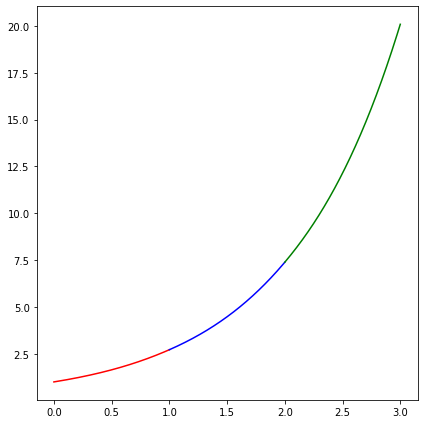

In [97]:
plt.rcParams["figure.figsize"] = [6,6]
plt.rcParams["figure.autolayout"] = True
plt.plot(interval_1,s1,'r')
plt.plot(interval_2,s2,'b')
plt.plot(interval_3,s3,'g')
plt.show()

#### Ejercicio 2

In [98]:
spline_1 = [(1,3),(2,3.7),(5,3.9),(6,4.2),(7,5.7),(8,6.6),(10,7.1),(13,6.7),(17,4.5)]
derivadas_spline_1 = (1,-(2/3))
spline_2 = [(17,4.5),(20,7),(23,6.1),(24,5.6),(25,5.8),(27,5.2),(27.7,4.1)]
derivadas_spline_2 = (3,-4)
spline_3 = [(27.7,4.1),(28,4.3),(29,4.1),(30,3)]
derivadas_spline_3 = (1/3,-(3/2))

In [99]:
coeficientes_spline_1 = interpolacion_spline(spline_1,derivadas_spline_1[0],derivadas_spline_1[1])
coeficientes_spline_2 = interpolacion_spline(spline_2,derivadas_spline_2[0],derivadas_spline_2[1])
coeficientes_spline_3 = interpolacion_spline(spline_3,derivadas_spline_3[0],derivadas_spline_3[1])

In [100]:
import pandas as pd

In [101]:
def curva_dataframe(nombre,coeficientes_spline):
    lista_nombres = [[nombre,nombre,nombre,nombre],["a","b","c","d"]]
    tuplas = list(zip(*lista_nombres))
    indice = pd.MultiIndex.from_tuples(tuplas, names=["Spline", "Coeficiente"])
    tabla_de_datos = pd.DataFrame(coeficientes_spline, index=indice)
    return tabla_de_datos

In [102]:
df1 = curva_dataframe("Spline 1",coeficientes_spline_1)
df2 = curva_dataframe("Spline 2",coeficientes_spline_2)
df3 = curva_dataframe("Spline 3",coeficientes_spline_3)
frames = [df1,df2,df3]
df_total = pd.concat(frames).T

In [103]:
df_total

Spline      Spline 1                               Spline 2            \
Coeficiente        a         b         c         d        a         b   
0                3.0  1.000000 -0.346810  0.046810      4.5  3.000000   
1                3.7  0.446810 -0.206380  0.026555      7.0 -0.197875   
2                3.9 -0.074479  0.032617  0.341862      6.1 -0.608501   
3                4.2  1.016340  1.058202 -0.574542      5.6 -0.111371   
4                5.7  1.409117 -0.665425  0.156308      5.8  0.153987   
5                6.6  0.547191 -0.196501  0.023953      5.2 -0.401178   
6                7.1  0.048621 -0.052784 -0.002623      4.1       NaN   
7                6.7 -0.338892 -0.076387  0.005903      NaN       NaN   
8                4.5       NaN -0.005556       NaN      NaN       NaN   

Spline                          Spline 3                                
Coeficiente         c         d        a         b         c         d  
0           -1.100708  0.126162      4.1  0.333333  2.244224 -3.777044  
1            0.034750 -0.022931      4.3  0.660066 -1.155116  0.295050  
2           -0.171626  0.280127      4.1 -0.765017 -0.269967 -0.065017  
3            0.668756 -0.357385      3.0       NaN -0.465017       NaN  
4           -0.403398  0.088202      NaN       NaN       NaN       NaN  
5            0.125815 -2.568002      NaN       NaN       NaN       NaN  
6           -5.266989       NaN      NaN       NaN       NaN       NaN  
7                 NaN       NaN      NaN       NaN       NaN       NaN  
8                 NaN       NaN      NaN       NaN       NaN       NaN

##### Grafico

Curva 1

In [104]:
interval_1_0 = linspace(1,2,100)
interval_2_0 = linspace(2,5,100)
interval_3_0 = linspace(5,6,100)
interval_4_0 = linspace(6,7,100)
interval_5_0 = linspace(7,8,100)
interval_6_0 = linspace(8,10,100)
interval_7_0 = linspace(10,13,100)
interval_8_0 = linspace(13,17,100)

In [105]:
a_0 = si(interval_1_0,coeficientes_spline_1[0],coeficientes_spline_1[1],coeficientes_spline_1[2],coeficientes_spline_1[3],0)
b_0 = si(interval_2_0,coeficientes_spline_1[0],coeficientes_spline_1[1],coeficientes_spline_1[2],coeficientes_spline_1[3],1)
c_0 = si(interval_3_0,coeficientes_spline_1[0],coeficientes_spline_1[1],coeficientes_spline_1[2],coeficientes_spline_1[3],2)
d_0 = si(interval_4_0,coeficientes_spline_1[0],coeficientes_spline_1[1],coeficientes_spline_1[2],coeficientes_spline_1[3],3)
e_0 = si(interval_5_0,coeficientes_spline_1[0],coeficientes_spline_1[1],coeficientes_spline_1[2],coeficientes_spline_1[3],4)
f_0 = si(interval_6_0,coeficientes_spline_1[0],coeficientes_spline_1[1],coeficientes_spline_1[2],coeficientes_spline_1[3],5)
g_0 = si(interval_7_0,coeficientes_spline_1[0],coeficientes_spline_1[1],coeficientes_spline_1[2],coeficientes_spline_1[3],6)
h_0 = si(interval_8_0,coeficientes_spline_1[0],coeficientes_spline_1[1],coeficientes_spline_1[2],coeficientes_spline_1[3],7)

Curva 2

In [106]:
interval_1_1 = linspace(17,20,100)
interval_2_1 = linspace(20,23,100)
interval_3_1 = linspace(23,24,100)
interval_4_1 = linspace(24,25,100)
interval_5_1 = linspace(25,27,100)
interval_6_1 = linspace(27,27.7,100)

In [107]:
a_1 = si(interval_1_1,coeficientes_spline_2[0],coeficientes_spline_2[1],coeficientes_spline_2[2],coeficientes_spline_2[3],0)
b_1 = si(interval_2_1,coeficientes_spline_2[0],coeficientes_spline_2[1],coeficientes_spline_2[2],coeficientes_spline_2[3],1)
c_1 = si(interval_3_1,coeficientes_spline_2[0],coeficientes_spline_2[1],coeficientes_spline_2[2],coeficientes_spline_2[3],2)
d_1 = si(interval_4_1,coeficientes_spline_2[0],coeficientes_spline_2[1],coeficientes_spline_2[2],coeficientes_spline_2[3],3)
e_1 = si(interval_5_1,coeficientes_spline_2[0],coeficientes_spline_2[1],coeficientes_spline_2[2],coeficientes_spline_2[3],4)
f_1 = si(interval_6_1,coeficientes_spline_2[0],coeficientes_spline_2[1],coeficientes_spline_2[2],coeficientes_spline_2[3],5)

Curva 3

In [108]:
interval_1_2 = linspace(27.7,28,100)
interval_2_2 = linspace(28,29,100)
interval_3_2 = linspace(29,30,100)

In [109]:
a_2 = si(interval_1_2,coeficientes_spline_3[0],coeficientes_spline_3[1],coeficientes_spline_3[2],coeficientes_spline_3[3],0)
b_2 = si(interval_2_2,coeficientes_spline_3[0],coeficientes_spline_3[1],coeficientes_spline_3[2],coeficientes_spline_3[3],1)
c_2 = si(interval_3_2,coeficientes_spline_3[0],coeficientes_spline_3[1],coeficientes_spline_3[2],coeficientes_spline_3[3],2)

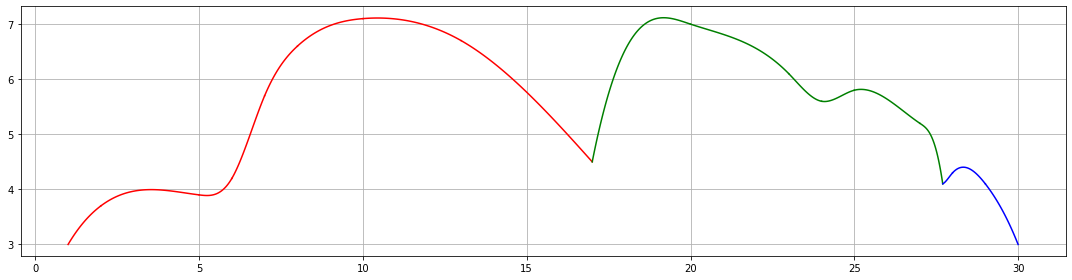

In [110]:
plt.rcParams["figure.figsize"] = [15,4]
plt.rcParams["figure.autolayout"] = True
# grafico spline 1
plt.plot(interval_1_0,a_0,'r')
plt.plot(interval_2_0,b_0,'r')
plt.plot(interval_3_0,c_0,'r')
plt.plot(interval_4_0,d_0,'r')
plt.plot(interval_5_0,e_0,'r')
plt.plot(interval_6_0,f_0,'r')
plt.plot(interval_7_0,g_0,'r')
plt.plot(interval_8_0,h_0,'r')
# grafico spline 2
plt.plot(interval_1_1,a_1,'g')
plt.plot(interval_2_1,b_1,'g')
plt.plot(interval_3_1,c_1,'g')
plt.plot(interval_4_1,d_1,'g')
plt.plot(interval_5_1,e_1,'g')
plt.plot(interval_6_1,f_1,'g')
# grafico spline 3
plt.plot(interval_1_2,a_2,'b')
plt.plot(interval_2_2,b_2,'b')
plt.plot(interval_3_2,c_2,'b')

plt.grid()
plt.show()